In [1]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame with encoding "ISO-8859-1"
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

# Print the first five rows of the DataFrame
# print(laptop_df.head())
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [2]:
# Get the data types of each column in the DataFrame
column_types = df.dtypes

# Print the data types of each column
print(column_types)

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object


# Baseline

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select the features to use for the regression models
X = df[['Inches', 'Ram', 'Memory']]

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Select the target variable
y = df['Price_euros']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, lin_reg_pred))
print('Linear Regression R^2:', r2_score(y_test, lin_reg_pred))

# Train and evaluate a Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_reg_pred = dt_reg.predict(X_test)
print('Decision Tree MSE:', mean_squared_error(y_test, dt_reg_pred))
print('Decision Tree R^2:', r2_score(y_test, dt_reg_pred))

# Train and evaluate a Random Forest model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)
print('Random Forest MSE:', mean_squared_error(y_test, rf_reg_pred))
print('Random Forest R^2:', r2_score(y_test, rf_reg_pred))

# Train and evaluate a KNN model
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg_pred = knn_reg.predict(X_test)
print('KNN MSE:', mean_squared_error(y_test, knn_reg_pred))
print('KNN R^2:', r2_score(y_test, knn_reg_pred))


Linear Regression MSE: 180354.12110521397
Linear Regression R^2: 0.6449208452189876
Decision Tree MSE: 232292.47811280115
Decision Tree R^2: 0.5426651950904839
Random Forest MSE: 189702.90220604878
Random Forest R^2: 0.6265150706729179
KNN MSE: 197630.53119187738
KNN R^2: 0.6109072443451606


In [4]:
import numpy as np

In [5]:
np.sqrt(180354)

424.6810567943901

In [6]:
y_test.mean()

1105.091800766283

# Prepare categorical columns

In [7]:
# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column is categorical
    if df[column].dtype == 'object':
        # Count the number of unique values in the column
        num_unique = len(df[column].unique())
        # Print the column name and number of unique values
        print(column, ':', num_unique)

Company : 19
Product : 618
TypeName : 6
ScreenResolution : 40
Cpu : 118
Ram : 9
Memory : 39
Gpu : 110
OpSys : 9
Weight : 179


In [8]:
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


# Several decisions on categorical columns

We have a relatively small number of observations, thus we do not want to increase number of features too much.

For categorical features:
- we will use one-hot encoding (creat N new columns, each is is_category1, is_category2, etc.)
- if we have many unique values, we will encode rare categories with `Other`
- we will extract some numerical features if possible

## One-hot encoding example

| Color | red | blue | green |
| --- | --- | --- | --- |
| red | 1 | 0 | 0 |
| blue | 0 | 1 | 0 |
| green | 0 | 0 | 1 |
| red | 1 | 0 | 0 |
| green | 0 | 0 | 1 |
| blue | 0 | 1 | 0 |
| red | 1 | 0 | 0 |
| green | 0 | 0 | 1 |
| blue | 0 | 1 | 0 |
| red | 1 | 0 | 0 |


## Plan for columns

- Company : 19, replcae rare categoris with "Other", 1-hot
- Product : 618, too many unique categories --> drop the column
- TypeName : 6, all good, will just 1-hot encode
- ScreenResolution : 40, extract width and height, convert to 2 numerical columns
- Cpu : 118, extract manufacturer name, 1-hot
- Ram : 9, convert "Ram" to numeric
- Memory : 39, extract two columns "has_ssd" and "has_hdd" (Could've also extract disk storage)
- Gpu : 110, extract manufacturer name, 1-hot
- OpSys : 9, extract os company, 1-hot
- Weight : 179, convert to numeric

In [9]:
ohe_columns = []

### Company

replace rare categories with "Other"

In [10]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [11]:
# Count the number of occurrences of each category in the 'Company' column
company_counts = df['Company'].value_counts()

# Get the list of categories with fewer than 100 occurrences
other_categories = company_counts[company_counts < 100].index.tolist()

# Replace the categories with 'Other'
df['Company'] = df['Company'].replace(other_categories, 'Other')

df['Company'].value_counts()

Dell      297
Lenovo    297
HP        274
Other     174
Asus      158
Acer      103
Name: Company, dtype: int64

In [12]:
other_categories

['MSI',
 'Toshiba',
 'Apple',
 'Samsung',
 'Razer',
 'Mediacom',
 'Microsoft',
 'Xiaomi',
 'Vero',
 'Chuwi',
 'Google',
 'Fujitsu',
 'LG',
 'Huawei']

In [13]:
ohe_columns.append('Company')

### Product

too many unique categories --> drop the column

In [14]:
df = df.drop('Product', axis=1)

### TypeName 

all good, will just one hot encode

In [15]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [16]:
ohe_columns.append('TypeName')

### ScreenResolution 

extract width and height, convert to 2 numerical columns

In [17]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [18]:
# Extract the height and width from the ScreenResolution column using a regular expression
height_width = df['ScreenResolution'].str.extract('(\d+)x(\d+)')

# Rename the columns to 'height' and 'width'
height_width.columns = ['height', 'width']

# Convert the height and width columns to integers
height_width = height_width.astype(int)

# Add the height and width columns to the laptop_df DataFrame
df = pd.concat([df, height_width], axis=1)


In [19]:
# drop "ScreenResolution" after preprocessing

In [20]:
df = df.drop('ScreenResolution', axis=1)

### Cpu

get company name

In [21]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [22]:
df['Cpu Type'] = df['Cpu'].str.extract('([A-Za-z]+(?:\s+[A-Za-z]+)*)')
df['Cpu Speed GHz'] = df['Cpu'].str.extract('(\d+\.*\d*)GHz')

In [23]:
df['Cpu Type'].value_counts()

Intel Core i                 1086
Intel Celeron Dual Core N      73
AMD A                          47
Intel Pentium Quad Core N      27
Intel Core M                   14
Intel Atom x                   10
AMD E                           9
Intel Celeron Quad Core N       8
Intel Celeron Dual Core         7
AMD Ryzen                       4
Intel Xeon E                    4
Intel Core M m                  3
AMD FX                          2
Intel Core M M                  2
Intel Pentium Dual Core         2
Intel Atom X                    2
Intel Atom Z                    1
Intel Pentium Dual Core N       1
Samsung Cortex A                1
Name: Cpu Type, dtype: int64

In [24]:
import re

df['Cpu Company'] = df['Cpu Type'].apply(lambda x: re.findall(r'^\w+', x)[0])

In [25]:
df['Cpu Company'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: Cpu Company, dtype: int64

In [26]:
# drop "Cpu" column, and "Cpu Type" column

df = df.drop(['Cpu', 'Cpu Type'], axis=1)

In [27]:
ohe_columns.append('Cpu Company')

In [28]:
df.dtypes

laptop_ID          int64
Company           object
TypeName          object
Inches           float64
Ram               object
Memory            object
Gpu               object
OpSys             object
Weight            object
Price_euros      float64
height             int64
width              int64
Cpu Speed GHz     object
Cpu Company       object
dtype: object

### Ram

convert "Ram" to numeric

In [29]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [30]:
df['Ram'] = df['Ram'].str.replace('GB','').astype(int)

### Memory

we will extract two columns "has_ssd" and "has_hdd"

In [31]:
def has_ssd(s):
    return int('SSD' in s)

def has_hdd(s):
    return int('HDD' in s)

df['has_SSD'] = df['Memory'].apply(has_ssd)
df['has_HDD'] = df['Memory'].apply(has_hdd)

In [32]:
df = df.drop('Memory', axis=1)

In [33]:
ohe_columns

['Company', 'TypeName', 'Cpu Company']

### Gpu

In [34]:
def get_manufacturer(s):
    if 'Intel' in s:
        return 'Intel'
    elif 'AMD' in s:
        return 'AMD'
    elif 'Nvidia' in s:
        return 'Nvidia'
    
df['GpuManufacturer'] = df['Gpu'].apply(get_manufacturer)

In [35]:
df = df.drop('Gpu', axis=1)
ohe_columns.append('GpuManufacturer')

### OpSys

encode as Windows and Other

In [36]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [37]:
# Count the number of occurrences of each category in the 'Company' column
os_counts = df['OpSys'].value_counts()

# Get the list of categories with fewer than 100 occurrences
other_categories = os_counts[os_counts < 100].index.tolist()

# Replace the categories with 'Other'
df['OpSys'] = df['OpSys'].replace(other_categories, 'Other')

df['OpSys'].value_counts()

Windows 10    1072
Other          231
Name: OpSys, dtype: int64

In [38]:
ohe_columns.append('OpSys')

### Weight

convert to numeric

In [39]:
df['Weight'] = df['Weight'].str.strip('kg').astype(float)

In [40]:
df.dtypes.sort_values()

laptop_ID            int64
Ram                  int64
height               int64
width                int64
has_SSD              int64
has_HDD              int64
Inches             float64
Weight             float64
Price_euros        float64
Company             object
TypeName            object
OpSys               object
Cpu Speed GHz       object
Cpu Company         object
GpuManufacturer     object
dtype: object

In [41]:
ohe_columns

['Company', 'TypeName', 'Cpu Company', 'GpuManufacturer', 'OpSys']

In [42]:
# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column is categorical
    if df[column].dtype == 'object':
        # Count the number of unique values in the column
        num_unique = len(df[column].unique())
        # Print the column name and number of unique values
        print(column, ':', num_unique)

Company : 6
TypeName : 6
OpSys : 2
Cpu Speed GHz : 29
Cpu Company : 3
GpuManufacturer : 4


### Cpu Speed GHz

convert to numeric

In [43]:
df['Cpu Speed GHz'] = df['Cpu Speed GHz'].astype(float)

# After feature preprocessing

In [44]:
df.head()

,laptop_ID,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,height,width,Cpu Speed GHz,Cpu Company,has_SSD,has_HDD,GpuManufacturer
0,1,Other,Ultrabook,13.3,8,Other,1.37,1339.69,2560,1600,2.3,Intel,1,0,Intel
1,2,Other,Ultrabook,13.3,8,Other,1.34,898.94,1440,900,1.8,Intel,0,0,Intel
2,3,HP,Notebook,15.6,8,Other,1.86,575.00,1920,1080,2.5,Intel,1,0,Intel
3,4,Other,Ultrabook,15.4,16,Other,1.83,2537.45,2880,1800,2.7,Intel,1,0,AMD
4,5,Other,Ultrabook,13.3,8,Other,1.37,1803.60,2560,1600,3.1,Intel,1,0,Intel


In [45]:
df.to_csv('laptop_price_preprocessed.csv')

In [46]:
from sklearn.metrics import mean_absolute_error

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select the features to use for the regression models
X = df.drop(ohe_columns, axis=1)
X = X.drop('Price_euros', axis=1)

# Convert categorical variables to one-hot encoding
X_ohe = pd.get_dummies(df[ohe_columns], drop_first=True)

# Concat all columns
X = pd.concat([X, X_ohe], axis=1)

# Select the target variable
y = df['Price_euros']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, lin_reg_pred))
print('Linear Regression R^2:', r2_score(y_test, lin_reg_pred))

# Train and evaluate a Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_reg_pred = dt_reg.predict(X_test)
print('Decision Tree MSE:', mean_squared_error(y_test, dt_reg_pred))
print('Decision Tree R^2:', r2_score(y_test, dt_reg_pred))

# Train and evaluate a Random Forest model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)
print('Random Forest MSE:', mean_squared_error(y_test, rf_reg_pred))
print('Random Forest R^2:', r2_score(y_test, rf_reg_pred))

# Train and evaluate a KNN model
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg_pred = knn_reg.predict(X_test)
print('KNN MSE:', mean_squared_error(y_test, knn_reg_pred))
print('KNN R^2:', r2_score(y_test, knn_reg_pred))


Linear Regression MSE: 140363.45529198938
Linear Regression R^2: 0.7236540159892074
Decision Tree MSE: 157647.63765325668
Decision Tree R^2: 0.6896251131490037
Random Forest MSE: 109329.68783322547
Random Forest R^2: 0.7847529465342983
KNN MSE: 330383.0581348352
KNN R^2: 0.34954557002860787


$$\mathrm{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y_i}|$$

$$\mathrm{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2$$

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y_i})^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}
$$


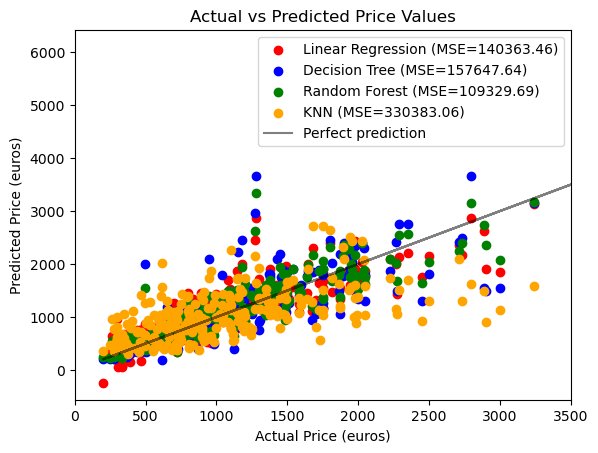

In [48]:
import matplotlib.pyplot as plt

# Calculate the MSE for each model
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
knn_reg_mse = mean_squared_error(y_test, knn_reg_pred)

# Create a scatter plot of actual vs predicted values for all models
plt.scatter(y_test, lin_reg_pred, color='red', label=f'Linear Regression (MSE={lin_reg_mse:.2f})')
plt.scatter(y_test, dt_reg_pred, color='blue', label=f'Decision Tree (MSE={dt_reg_mse:.2f})')
plt.scatter(y_test, rf_reg_pred, color='green', label=f'Random Forest (MSE={rf_reg_mse:.2f})')
plt.scatter(y_test, knn_reg_pred, color='orange', label=f'KNN (MSE={knn_reg_mse:.2f})')

# Add a perfect prediction line
perfect_predictions = y_test
plt.plot(perfect_predictions, perfect_predictions, color='black', alpha=0.5, label='Perfect prediction')

# Add a title, axis labels, and a legend
plt.title('Actual vs Predicted Price Values')
plt.xlabel('Actual Price (euros)')
plt.ylabel('Predicted Price (euros)')
plt.legend()
plt.xlim(0, 3500)

# Show the plot
plt.show()



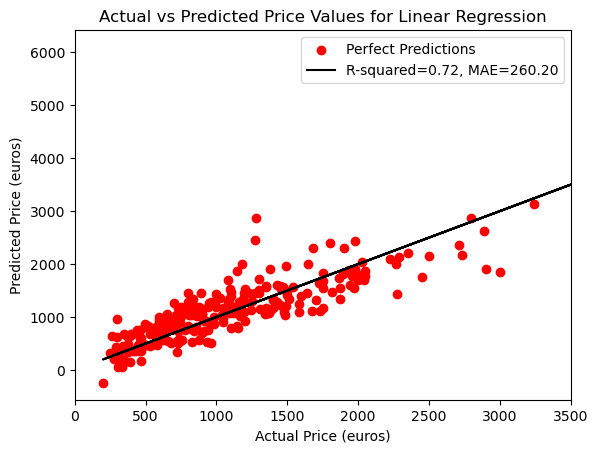

In [49]:
import matplotlib.pyplot as plt

lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
lin_reg_r2 = r2_score(y_test, lin_reg_pred)
lin_reg_mae = np.mean(np.abs(y_test - lin_reg_pred))

# Create a scatter plot of actual vs predicted values for the linear model
plt.scatter(y_test, lin_reg_pred, color='red')

# Add a perfect prediction line
perfect_predictions = y_test
plt.plot(perfect_predictions, perfect_predictions, color='black')

# Add a title, axis labels, and a legend
plt.title('Actual vs Predicted Price Values for Linear Regression')
plt.xlabel('Actual Price (euros)')
plt.ylabel('Predicted Price (euros)')
plt.legend(['Perfect Predictions', f'R-squared={lin_reg_r2:.2f}, MAE={lin_reg_mae:.2f}'])
plt.xlim(0, 3500)

# Show the plot
plt.show()
